In [1]:
# plot the intensity of dots for the union and intersected dat lists between FA-DpnI, HiC-DSG-DpnII and MicroC-DSG-MNase
# "dot_lists_quantification.py" is used to calcuate dot intensity

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import glob, os
import os.path
from scipy.stats import rankdata
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: read_table is deprecated, use read_csv instead.
/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: read_table is deprecated, use read_csv instead.
/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: read_table is deprecated, use read_csv instead.


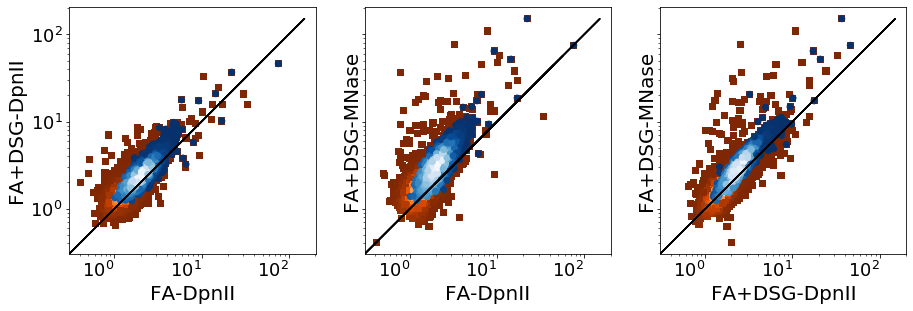

In [2]:
intersect=["ESC_intersect_HiC-FA-DpnII.intensity.txt", 
"ESC_intersect_HiC-DSG-DpnII.intensity.txt", 
"ESC_intersect_MicroC-DSG-MNase.intensity.txt"]



union=["ESC_union_HiC-FA-DpnII.intensity.txt", 
"ESC_union_HiC-DSG-DpnII.intensity.txt", 
"ESC_union_MicroC-DSG-MNase.intensity.txt"]

fig, ax = plt.subplots(ncols=3,sharex=True, sharey=True,figsize=(15,6))
data=[union,intersect]
col_maps=["Oranges_r","Blues_r"]
ss=[50,50]
m=["s","o"]
k=0
for i in data: 
    new_data=pd.DataFrame()
    ESC_FA_DpnII = pd.read_table(i[0], sep="\t", index_col=None)
    ESC_DSG_DpnII = pd.read_table(i[1], sep="\t", index_col=None)
    ESC_DSG_MNase = pd.read_table(i[2], sep="\t", index_col=None)

    ESC_FA_DpnII = ESC_FA_DpnII[:-1]
    ESC_DSG_DpnII = ESC_DSG_DpnII[:-1]
    ESC_DSG_MNase = ESC_DSG_MNase[:-1]

    ESC_FA_DpnII_df=ESC_FA_DpnII
    ESC_DSG_DpnII_df=ESC_DSG_DpnII
    ESC_DSG_MNase_df=ESC_DSG_MNase 


    new_data=pd.DataFrame()
    new_data=pd.concat([new_data,ESC_FA_DpnII_df["intensity"]],axis=1)
    new_data=pd.concat([new_data,ESC_DSG_DpnII_df["intensity"]],axis=1)
    new_data=pd.concat([new_data,ESC_DSG_MNase_df["intensity"]],axis=1)
    new_data.columns=["FA-DpnII","FA+DSG-DpnII","FA+DSG-MNase"]

    rowsum=new_data.sum(axis=1)
    new_data2=pd.DataFrame()
    new_data.columns=["FA-DpnII","FA+DSG-DpnII","FA+DSG-MNase"]
    for i in range(len(rowsum)):
        if rowsum[i] < 210:
            #print(rowsum[i])
            #print(new_data.iloc[i,:])
            new_data2=pd.concat([new_data2,pd.DataFrame(new_data.iloc[i,:].values).T],axis=0)
    new_data2.columns=["FA-DpnII","FA+DSG-DpnII","FA+DSG-MNase"]

    xy = np.vstack([new_data2["FA-DpnII"].fillna(0),new_data2["FA+DSG-DpnII"].fillna(0)])
    z = gaussian_kde(xy)(xy)
    ax[0].scatter(new_data2["FA-DpnII"].fillna(0),new_data2["FA+DSG-DpnII"].fillna(0),c=z,cmap=col_maps[k], s=ss[k], edgecolor='',marker=m[k])
    ax[0].plot(new_data2["FA+DSG-MNase"],new_data2["FA+DSG-MNase"],'k-')

    #ax[1] = fig.add_subplot(132, aspect='equal')

    xt = np.vstack([new_data2["FA-DpnII"].fillna(0),new_data2["FA+DSG-MNase"].fillna(0)])
    w = gaussian_kde(xt)(xt)
    ax[1].scatter(new_data2["FA-DpnII"].fillna(0),new_data2["FA+DSG-MNase"].fillna(0),c=w,cmap=col_maps[k], s=ss[k], edgecolor='',marker=m[k])
    ax[1].plot(new_data2["FA+DSG-MNase"],new_data2["FA+DSG-MNase"],'k-')

    xs = np.vstack([new_data2["FA+DSG-DpnII"].fillna(0),new_data2["FA+DSG-MNase"].fillna(0)])
    r = gaussian_kde(xs)(xs)
    ax[2].scatter(new_data2["FA+DSG-DpnII"].fillna(0),new_data2["FA+DSG-MNase"].fillna(0),c=r,cmap=col_maps[k], s=50, edgecolor='',marker=m[k])
    ax[2].plot(new_data2["FA+DSG-MNase"],new_data2["FA+DSG-MNase"],'k-')
    k=k+1

#ax[0].set_title('FA-DpnII vs DSG-DpnII',fontsize=15)
ax[0].set_xlabel("FA-DpnII",fontsize=20)
ax[0].set_ylabel("FA+DSG-DpnII",fontsize=20)
ax[0].set_aspect('equal', 'box')
#ax[0].set_xlim([0,2])
#ax[0].set_ylim([0,2])
ax[0].set_xscale('log',basex=10)
ax[0].set_yscale('log',basey=10)
plt.setp(ax[0].get_xticklabels(), fontsize=18, horizontalalignment="right")
plt.setp(ax[0].get_yticklabels(), fontsize=18, horizontalalignment="right")

#ax[1].set_title('FA-DpnII vs DSG-MNase',fontsize=15)
ax[1].set_xlabel("FA-DpnII",fontsize=20)
ax[1].set_ylabel("FA+DSG-MNase",fontsize=20)
#ax[1].set_xlim([0,2])
#ax[1].set_ylim([0,2])
ax[1].set_xscale('log',basex=10)
ax[1].set_yscale('log',basey=10)
ax[1].set_aspect('equal', 'box')
plt.setp(ax[1].get_xticklabels(), fontsize=18, horizontalalignment="right")
plt.setp(ax[1].get_yticklabels(), fontsize=18, horizontalalignment="right")
#ax[2].set_title('DSG-DpnII vs DSG-MNase',fontsize=15)
ax[2].set_xlabel("FA+DSG-DpnII",fontsize=20)
ax[2].set_ylabel("FA+DSG-MNase",fontsize=20)
ax[2].set_aspect('equal', 'box')
#ax[2].set_xlim([0,2])
#ax[2].set_ylim([0,2])
ax[2].set_xscale('log',basex=10)
ax[2].set_yscale('log',basey=10)
plt.setp(ax[2].get_xticklabels(), fontsize=18, horizontalalignment="right")
plt.setp(ax[2].get_yticklabels(), fontsize=18, horizontalalignment="right")
plt.savefig("ESC_loop_intensity_union_intersect_log10.png",dpi=300)


/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: read_table is deprecated, use read_csv instead.
/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: read_table is deprecated, use read_csv instead.
/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: read_table is deprecated, use read_csv instead.


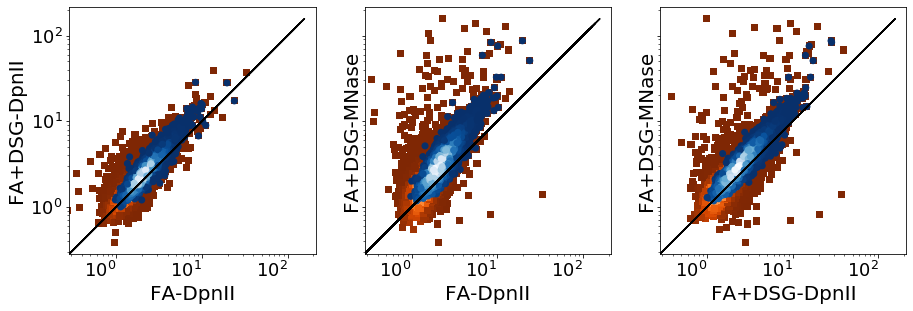

In [4]:
intersect=["HFFc6_intersect_HiC-FA-DpnII.intensity.txt", 
"HFFc6_intersect_HiC-DSG-DpnII.intensity.txt", 
"HFFc6_intersect_MicroC-DSG-MNase.intensity.txt"]



union=["HFFc6_union_HiC-FA-DpnII.intensity.txt", 
"HFFc6_union_HiC-DSG-DpnII.intensity.txt", 
"HFFc6_union_MicroC-DSG-MNase.intensity.txt"]

fig, ax = plt.subplots(ncols=3,sharex=True, sharey=True,figsize=(15,6))
data=[union,intersect]
col_maps=["Oranges_r","Blues_r"]
ss=[50,50]
m=["s","o"]
k=0

for i in data: 
    new_data=pd.DataFrame()
    HFF_FA_DpnII = pd.read_table(i[0], sep="\t", index_col=None)
    HFF_DSG_DpnII = pd.read_table(i[1], sep="\t", index_col=None)
    HFF_DSG_MNase = pd.read_table(i[2], sep="\t", index_col=None)

    HFF_FA_DpnII = HFF_FA_DpnII[:-1]
    HFF_DSG_DpnII = HFF_DSG_DpnII[:-1]
    HFF_DSG_MNase = HFF_DSG_MNase[:-1]

    HFF_FA_DpnII_df=HFF_FA_DpnII 
    HFF_DSG_DpnII_df=HFF_DSG_DpnII
    HFF_DSG_MNase_df=HFF_DSG_MNase 

    new_data=pd.concat([new_data,HFF_FA_DpnII_df["intensity"]],axis=1)
    new_data=pd.concat([new_data,HFF_DSG_DpnII_df["intensity"]],axis=1)
    new_data=pd.concat([new_data,HFF_DSG_MNase_df["intensity"]],axis=1)
    new_data.columns=["FA-DpnII","FA+DSG-DpnII","FA+DSG-MNase"]

    rowsum=new_data.sum(axis=1)
    new_data2=pd.DataFrame()
    new_data.columns=["FA-DpnII","FA+DSG-DpnII","FA+DSG-MNase"]
    rowsum=new_data.sum(axis=1)
    new_data2=pd.DataFrame()
    new_data.columns=["FA-DpnII","FA+DSG-DpnII","FA+DSG-MNase"]
   
    for i in range(len(rowsum)):
        if rowsum[i] < 210:
            #print(rowsum[i])
            #print(new_data.iloc[i,:])
            new_data2=pd.concat([new_data2,pd.DataFrame(new_data.iloc[i,:].values).T],axis=0)
    new_data2.columns=["FA-DpnII","FA+DSG-DpnII","FA+DSG-MNase"]
    xy = np.vstack([new_data2["FA-DpnII"].fillna(0),new_data2["FA+DSG-DpnII"].fillna(0)])
    z = gaussian_kde(xy)(xy)
    ax[0].scatter(new_data2["FA-DpnII"].fillna(0),new_data2["FA+DSG-DpnII"].fillna(0),c=z,cmap=col_maps[k], s=ss[k], edgecolor='',marker=m[k])
    ax[0].plot(new_data2["FA+DSG-MNase"],new_data2["FA+DSG-MNase"],'k-')

    #ax[1] = fig.add_subplot(132, aspect='equal')

    xt = np.vstack([new_data2["FA-DpnII"].fillna(0),new_data2["FA+DSG-MNase"].fillna(0)])
    w = gaussian_kde(xt)(xt)
    ax[1].scatter(new_data2["FA-DpnII"].fillna(0),new_data2["FA+DSG-MNase"].fillna(0),c=w,cmap=col_maps[k], s=ss[k], edgecolor='',marker=m[k])
    ax[1].plot(new_data2["FA+DSG-MNase"],new_data2["FA+DSG-MNase"],'k-')

    xs = np.vstack([new_data2["FA+DSG-DpnII"].fillna(0),new_data2["FA+DSG-MNase"].fillna(0)])
    r = gaussian_kde(xs)(xs)
    ax[2].scatter(new_data2["FA+DSG-DpnII"].fillna(0),new_data2["FA+DSG-MNase"].fillna(0),c=r,cmap=col_maps[k], s=50, edgecolor='',marker=m[k])
    ax[2].plot(new_data2["FA+DSG-MNase"],new_data2["FA+DSG-MNase"],'k-')
    k=k+1
    
#ax[0].set_title('FA-DpnII vs DSG-DpnII',fontsize=15)
ax[0].set_xlabel("FA-DpnII",fontsize=20)
ax[0].set_ylabel("FA+DSG-DpnII",fontsize=20)
ax[0].set_aspect('equal', 'box')
#ax[0].set_xlim([0,2])
#ax[0].set_ylim([0,2])
ax[0].set_xscale('log',basex=10)
ax[0].set_yscale('log',basey=10)
plt.setp(ax[0].get_xticklabels(), fontsize=18, horizontalalignment="right")
plt.setp(ax[0].get_yticklabels(), fontsize=18, horizontalalignment="right")

#ax[1].set_title('FA-DpnII vs DSG-MNase',fontsize=15)
ax[1].set_xlabel("FA-DpnII",fontsize=20)
ax[1].set_ylabel("FA+DSG-MNase",fontsize=20)
#ax[1].set_xlim([0,2])
#ax[1].set_ylim([0,2])
ax[1].set_xscale('log',basex=10)
ax[1].set_yscale('log',basey=10)
ax[1].set_aspect('equal', 'box')
plt.setp(ax[1].get_xticklabels(), fontsize=18, horizontalalignment="right")
plt.setp(ax[1].get_yticklabels(), fontsize=18, horizontalalignment="right")
#ax[2].set_title('DSG-DpnII vs DSG-MNase',fontsize=15)
ax[2].set_xlabel("FA+DSG-DpnII",fontsize=20)
ax[2].set_ylabel("FA+DSG-MNase",fontsize=20)
ax[2].set_aspect('equal', 'box')
#ax[2].set_xlim([0,2])
#ax[2].set_ylim([0,2])
ax[2].set_xscale('log',basex=10)
ax[2].set_yscale('log',basey=10)
plt.setp(ax[2].get_xticklabels(), fontsize=18, horizontalalignment="right")
plt.setp(ax[2].get_yticklabels(), fontsize=18, horizontalalignment="right")
#plt.savefig("HFF_FA_DSG_DpnII_MicroC_loop_intensity_union_intersect.pdf")
plt.savefig("HFFc6_loop_intensity_union_intersect_log10.png",dpi=300)